In [1]:
conda env list

# conda environments:
#
base                     /Users/achartra/Applications/miniforge3
PINNICLE              *  /Users/achartra/Applications/miniforge3/envs/PINNICLE
allison                  /Users/achartra/Applications/miniforge3/envs/allison


Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('CPU')))


Num GPUs Available:  1


In [1]:
# Testing PINNICLE
# Infer basal friction coefficients using SSA

import pinnicle as pinn
import numpy as np
import deepxde as dde
import matplotlib.pyplot as plt
from datetime import datetime

# Set up some configurations
dde.config.set_default_float('float64')
dde.config.disable_xla_jit()
dde.config.set_random_seed(1234)


Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Disable just-in-time compilation with XLA.


Set the default float type to float64


In [ ]:
# experiment.load_model(path='./PINNs/Ryder_test_I20240729_140936_P20240729_154130')
# experiment = pinn.PINN(loadFrom='./PINNs/Ryder_test_I20240729_140936_P20240731_144431')

experiment.load_model(path='./PINNs/Ryder_test_I20240729_140936_P20240731_141329')
new_folder = experiment.params.
experiment.update_parameters({"save_path": new_folder})

In [ ]:
print(experiment.params)

In [2]:
# Load the correct data

issm_filename = "Ryder_test_I21-Nov-2024_15-49-30mat"
datestr = datetime.now().strftime("%d-%b-%y_%H-%M-%S")

issm_pinn_path = issm_filename + "_P" + datestr
# General parameters for training
# Setting up dictionaries
# order doesn't matter, but keys DO matter
hp = {}

# Load data ? 
# In data_size, each key:value pair defines a variable in the training. 
# if the key is not redefined in name_map, then it will be used as default 
# or set in the physics section above. The value associated with the key 
# gives the number of data points used for training.
# If the value is set to None, then only Dirichlet BC around the domain 
# boundary will be used for the corresponding key. If the variable is included
# in the training, but not given in data_size, then there will be no data for this variable in the training
issm = {}
issm["data_path"] = "./Models/" + issm_filename + ".mat"
issm["data_size"] = {"u":1000, "v":1000, "s":1000, "H":1000, "C":1000, "vel":1000}
hp["data"] = {"ISSM":issm}

hp["epochs"] = int(1e3)
hp["learning_rate"] = 0.0001
hp["loss_function"] = "MSE"
hp["save_path"] = "./PINNs/" + issm_pinn_path
hp["is_save"] = True
hp["is_plot"] = True

# Set NN architecture
hp["activation"] = "tanh"
hp["initializer"] = "Glorot uniform"
hp["num_neurons"] = 20
hp["num_layers"] = 6
hp["input"] = ['y', 'x']

# Define domain of computation
hp["shapefile"] = "./Ryder_32_09.exp"
# Define number of collocation points used to evaluate PDE residual
hp["num_collocation_points"] = 1000

# Add physics
SSA = {}
SSA["scalar_variables"] = {"B":5.278336e+07}
hp["equations"] = {"SSA":SSA}
# MOLHO = {}
# MOLHO["scalar_variables"] = {"B":1.26802073401e+08}
# hp["equations"] = {"MOLHO":MOLHO}

# Add an additional loss function to balance the contributions between the fast flow and slow moving regions:
vel_loss = {}
vel_loss['name'] = "vel log"
vel_loss['function'] = "VEL_LOG"
vel_loss['weight'] = 1.0e-5
hp["additional_loss"] = {"vel":vel_loss}

experiment = pinn.PINN(hp)
experiment.update_parameters(hp)
print(experiment.params) # make sure that settings are in correct spot (keys must be correct)

ERROR:root:ERROR: MATLAB type not supported: qmustatistics, (uint32)
ERROR:root:ERROR: MATLAB type not supported: lovenumbers, (uint32)
ERROR:root:ERROR: MATLAB type not supported: rotational, (uint32)
ERROR:root:ERROR: MATLAB type not supported: solidearthsettings, (uint32)
ERROR:root:ERROR: MATLAB type not supported: qmustatistics, (uint32)
ERROR:root:ERROR: MATLAB type not supported: lovenumbers, (uint32)
ERROR:root:ERROR: MATLAB type not supported: rotational, (uint32)
ERROR:root:ERROR: MATLAB type not supported: solidearthsettings, (uint32)


add input transform with [ -128000. -1134000.] and [  22000. -984000.]
add output transform with [-3.1709792e-04 -3.1709792e-04 -1.0000000e+03  1.0000000e+01
  1.0000000e-02] and [3.1709792e-04 3.1709792e-04 3.6000000e+03 3.5000000e+03 1.0000000e+04]
add input transform with [ -128000. -1134000.] and [  22000. -984000.]
add output transform with [-3.1709792e-04 -3.1709792e-04 -1.0000000e+03  1.0000000e+01
  1.0000000e-02] and [3.1709792e-04 3.1709792e-04 3.6000000e+03 3.5000000e+03 1.0000000e+04]
Parameters: 
	TrainingParameter: 
		epochs:	1000
		optimizer:	adam
		loss_functions:	['MSE', 'MSE', 'MSE', 'MSE', 'MSE', 'MSE', 'MSE', <function surface_log_vel_misfit_tf at 0x31bf543a0>]
		additional_loss:	{'vel': <pinnicle.parameter.LossFunctionParameter object at 0x31d10b070>}
		learning_rate:	0.0001
		loss_weights:	[1e-10, 1e-10, 9945192.96, 9945192.96, 1e-06, 1e-06, 1e-08, 1e-05]
		has_callbacks:	False
		min_delta:	None
		patience:	None
		period:	None
		checkpoint:	False
		save_path:	./PI

In [18]:
# pinn.params.nn.output_ub[4] = 1e3
print(experiment.params.nn.physics.variable_ub)


AttributeError: 'NNParameter' object has no attribute 'physics'

Compiling model...
'compile' took 0.004530 s

Training model...



/Users/achartra/Applications/miniforge3/envs/PINNICLE/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
2024-11-21 17:58:23.032414: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Step      Train loss                                                                          Test loss                                                                           Test metric
0         [1.58e+01, 7.81e+01, 2.94e-03, 1.91e-02, 5.18e-01, 1.22e-01, 2.52e-01, 6.65e-03]    [1.58e+01, 7.81e+01, 2.94e-03, 1.91e-02, 5.18e-01, 1.22e-01, 2.52e-01, 6.65e-03]    []  
1000      [1.04e-01, 3.65e-01, 3.18e-06, 1.81e-05, 4.52e-01, 4.62e-02, 1.83e-01, 4.38e-03]    [1.04e-01, 3.65e-01, 3.18e-06, 1.81e-05, 4.52e-01, 4.62e-02, 1.83e-01, 4.38e-03]    []  

Best model at step 1000:
  train loss: 1.15e+00
  test loss: 1.15e+00
  test metric: []

'train' took 94.243084 s



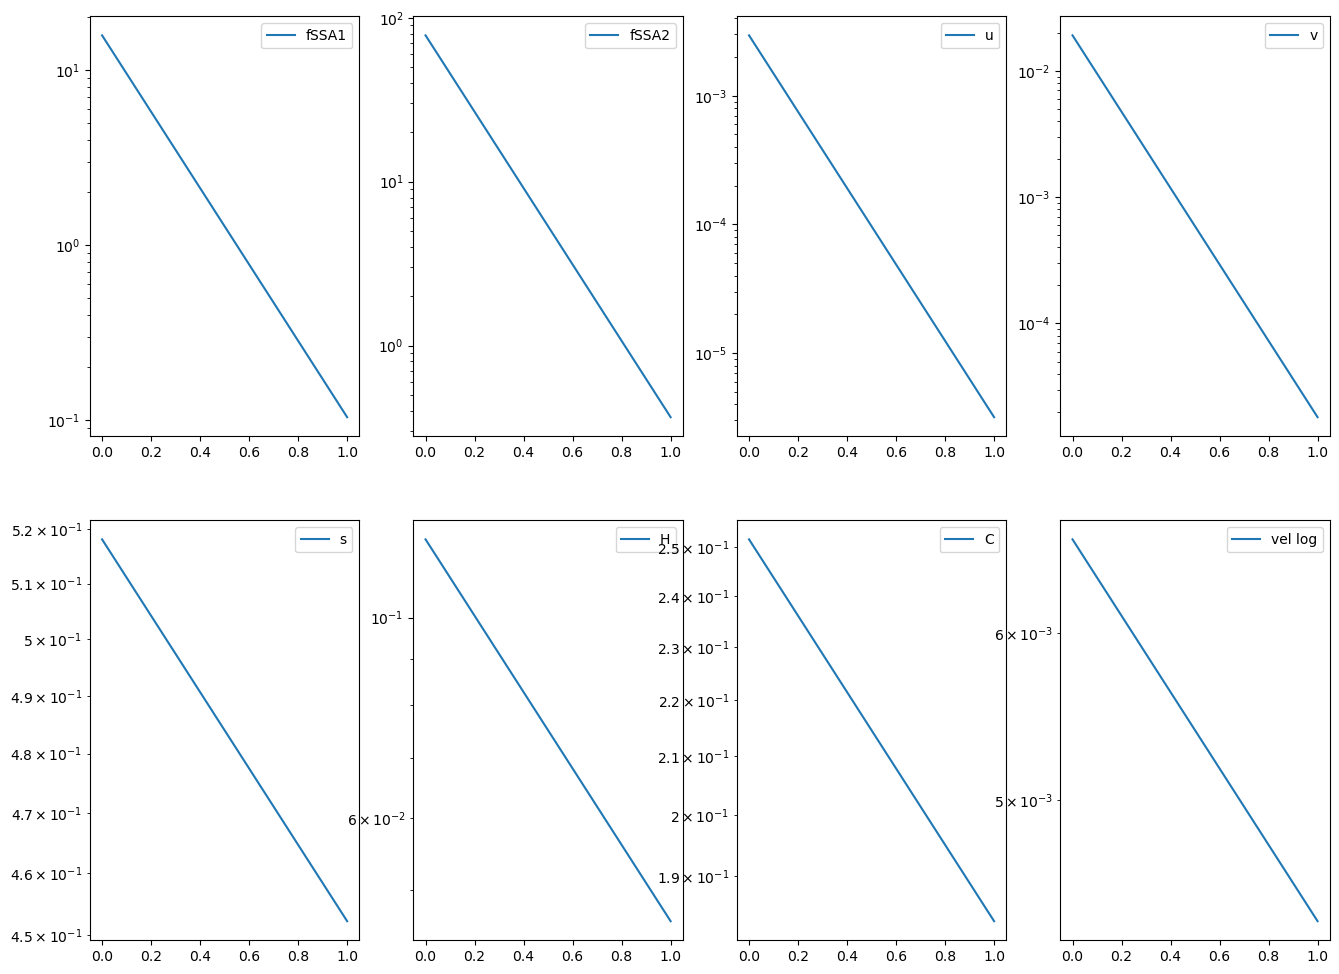

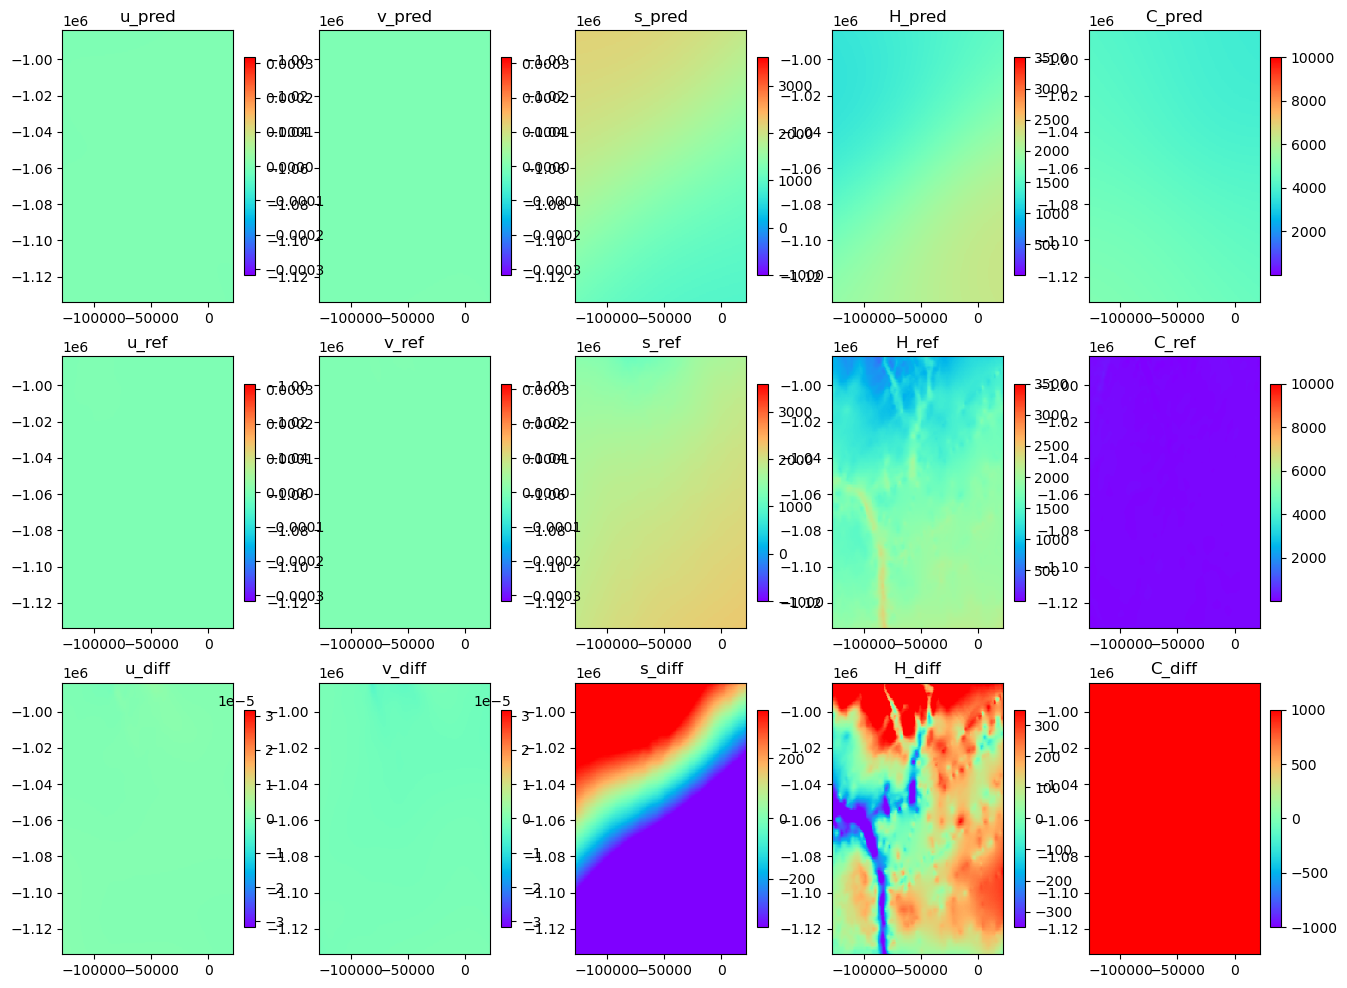

In [3]:
# Now run the PINN model
experiment.compile()

# Train
experiment.train()
# Show results
experiment.plot_predictions(X_ref=experiment.model_data.data["ISSM"].X_dict, sol_ref=experiment.model_data.data["ISSM"].data_dict)

In [10]:
# How to print different sections of model
# print(experiment.params.training)

print(experiment.params.nn.output_lb)
print(experiment.model.predict)

pinn = experiment

import deepxde.backend as bkd

resolution = 200
    # generate 200x200 mesh on the domain
X, Y = np.meshgrid(np.linspace(pinn.params.nn.input_lb[0], pinn.params.nn.input_ub[0], resolution),
                   np.linspace(pinn.params.nn.input_lb[1], pinn.params.nn.input_ub[1], resolution))
X_nn = np.hstack((X.flatten()[:,None], Y.flatten()[:,None]))
grid_size = 2.0*(((pinn.params.nn.input_ub[0] - pinn.params.nn.input_lb[0])/resolution)**2+
                 ((pinn.params.nn.input_ub[1] - pinn.params.nn.input_lb[1])/resolution)**2)**0.5
if bkd.backend_name == "pytorch":
    grid_size = bkd.to_numpy(grid_size)

# predicted solutions
sol_pred = pinn.model.predict(X_nn)
plot_data = {k+"_pred":np.reshape(sol_pred[:,i:i+1], X.shape) for i,k in enumerate(pinn.params.nn.output_variables)}

[-3.1709792e-04 -3.1709792e-04 -1.0000000e+03  1.0000000e+01
  1.0000000e-02]
<bound method Model.predict of <deepxde.model.Model object at 0x31d10bbe0>>


In [12]:
print(plot_data)

{'u_pred': array([[ 1.97061861e-07,  1.89372751e-07,  1.82089066e-07, ...,
        -4.88666168e-08, -5.49677020e-08, -6.09202831e-08],
       [ 1.93819343e-07,  1.85978598e-07,  1.78542850e-07, ...,
        -4.90350337e-08, -5.48231878e-08, -6.04610492e-08],
       [ 1.91141603e-07,  1.83151179e-07,  1.75565198e-07, ...,
        -4.91431132e-08, -5.46198797e-08, -5.99446122e-08],
       ...,
       [-1.93967739e-07, -1.95084345e-07, -1.96343043e-07, ...,
         3.72875854e-07,  3.67197162e-07,  3.61072191e-07],
       [-2.02623068e-07, -2.04051862e-07, -2.05620857e-07, ...,
         3.62797853e-07,  3.57304715e-07,  3.51365159e-07],
       [-2.11276409e-07, -2.13019068e-07, -2.14900000e-07, ...,
         3.52066672e-07,  3.46759951e-07,  3.41006801e-07]]), 'v_pred': array([[-2.13084114e-07, -2.17623434e-07, -2.21976180e-07, ...,
        -1.45784670e-09, -1.89022146e-08, -3.68795614e-08],
       [-2.10330553e-07, -2.15058132e-07, -2.19602463e-07, ...,
        -1.38716812e-08, -3.12782

In [5]:
import hdf5storage
import scipy
 
mat_data = {} # make a dictionary to store the MAT data in
vars2save = ['sol_pred','X_nn']
for i, var_curr in enumerate(vars2save):
    exec(f'mat_data[u"{var_curr}"] = {var_curr}')
 
hdf5storage.savemat(hp["save_path"] + '/' + issm_pinn_path + '_predictions.mat', mat_data, format='7.3', oned_as='row', store_python_metadata=True)

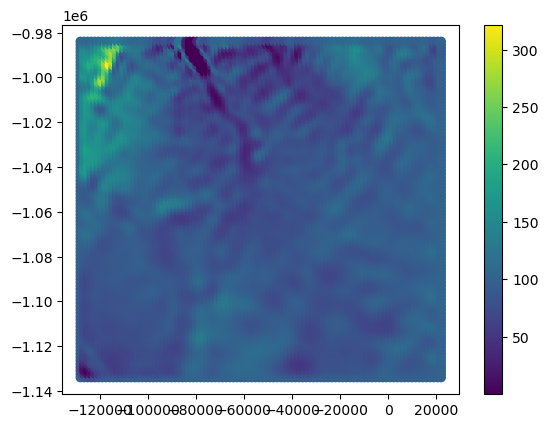

In [4]:
# Plotting attempts

# Show results
# experiment.plot_predictions(X_ref=experiment.model_data.data["ISSM"].X_dict, sol_ref=experiment.model_data.data["ISSM"].data_dict)

# pinn.utils.plotting.plot_data(experiment.model_data.data["ISSM"].X_dict['x'],experiment.model_data.data["ISSM"].X_dict['y'], experiment.model_data.data["ISSM"].data_dict['u'])

plt.scatter(experiment.model_data.data["ISSM"].X_dict['x'], experiment.model_data.data["ISSM"].X_dict['y'], c=experiment.model_data.data["ISSM"].data_dict['C'], cmap='viridis')
plt.colorbar()